# Multilingual Prompt Optimizer - Interactive Demo

This notebook demonstrates the **Multilingual Prompt Optimizer** (MPO) - a system that adapts LLM prompts for cultural and linguistic appropriateness across languages.

## 🎯 What You'll Learn

1. How cultural adaptation improves LLM outputs
2. The difference between translation and cultural transformation
3. Comparing German (low-context) vs. Spanish (high-context) adaptations
4. Metrics for evaluating multilingual prompt quality

## 🚀 Setup

In [42]:
# Import required libraries
import sys
sys.path.append('../src')

from mpo.core.prompt import PromptTemplate, PromptDomain, FormalityLevel
from mpo.adapters import get_adapter, EnglishAdapter, GermanAdapter, SpanishAdapter
from mpo.providers import LocalLLMProvider
from mpo.core.evaluator import PromptEvaluator
from mpo.storage.cache_manager import CacheManager
from mpo.metrics import quantitative, qualitative

import yaml
from pathlib import Path

print("✅ Imports successful!")

✅ Imports successful!


## Part 1: Understanding Cultural Adaptation

### The Problem: Translation ≠ Cultural Appropriateness

Consider a simple business request:

In [43]:
# English baseline prompt
english_prompt = """
I need to request an extension for the project deadline.
The current deadline is next Friday, but I need until next month.
"""

print("🇺🇸 English (baseline):")
print(english_prompt)

🇺🇸 English (baseline):

I need to request an extension for the project deadline.
The current deadline is next Friday, but I need until next month.



### Naive Translation vs. Cultural Adaptation

**Naive Translation** (word-for-word):
- 🇩🇪 German: "Ich brauche eine Verlängerung für die Projektfrist..."
- 🇪🇸 Spanish: "Necesito solicitar una extensión para la fecha límite..."

**Problem**: While semantically correct, these translations ignore:
- ❌ Cultural communication norms (direct vs. indirect)
- ❌ Formality expectations (Sie vs. du, usted vs. tú)
- ❌ Relationship dynamics (task-focused vs. relational)

**Our Approach**: Apply cultural transformation rules based on linguistic theory.

## Part 2: Loading Configuration

Our system uses YAML configuration files with cultural parameters for each language:

In [44]:
# Load language configurations
with open('../config/languages.yaml') as f:
    languages_config = yaml.safe_load(f)

#### Language Configurations for German

In [45]:
lang_code = 'de'
language = '🇩🇪 German '
# Inspect German cultural parameters
print(f"{language}Cultural Parameters:")
print(f"Context Sensitivity: {languages_config['languages'][lang_code]['cultural_params']['context_sensitivity']}")
print(f"Directness: {languages_config['languages'][lang_code]['cultural_params']['directness']}")
print(f"\nFormality Markers:")
for marker in ['formal','neutral','casual']: 
    print(f"\n==={marker.title()}===")
    for key, value in languages_config['languages'][lang_code]['cultural_params']['formality_levels'][marker].items():
        print(f"  {key}: {value}")

🇩🇪 German Cultural Parameters:
Context Sensitivity: medium
Directness: very_high

Formality Markers:

===Formal===
  pronoun: Sie
  pronoun_verb: sind
  greeting: Sehr geehrte Damen und Herren
  closing: Mit freundlichen Grüßen
  tone: Formal business communication, professional and respectful

===Neutral===
  pronoun: Sie
  pronoun_verb: sind
  greeting: Guten Tag
  closing: Mit freundlichen Grüßen
  tone: Professional standard, default for business

===Casual===
  pronoun: du
  pronoun_verb: bist
  greeting: Hallo
  closing: Viele Grüße
  tone: Friendly and direct, used among peers and friends


#### Language Configurations for Spanish

In [46]:
# Inspect Spanish cultural parameters
lang_code = 'es'
language = '🇪🇸 Spanish '
# Inspect German cultural parameters
print(f"{language}Cultural Parameters:")
print(f"Context Sensitivity: {languages_config['languages'][lang_code]['cultural_params']['context_sensitivity']}")
print(f"Directness: {languages_config['languages'][lang_code]['cultural_params']['directness']}")
print(f"\nFormality Markers:")
for marker in ['formal','neutral','casual']: 
    print(f"\n==={marker.title()}===")
    for key, value in languages_config['languages'][lang_code]['cultural_params']['formality_levels'][marker].items():
        print(f"  {key}: {value}")

🇪🇸 Spanish Cultural Parameters:
Context Sensitivity: high
Directness: medium

Formality Markers:

===Formal===
  pronoun: usted
  pronoun_verb: es
  greeting: Estimado/a señor/señora
  greeting_titled: Distinguido/a
  closing: Cordialmente
  closing_formal: Respetuosamente
  tone: Very respectful, official/government communication

===Neutral===
  pronoun: usted
  pronoun_verb: es
  greeting: Buenos días
  greeting_respectful: Estimado/a
  closing: Atentamente
  closing_warm: Saludos cordiales
  tone: Professional with warmth, standard business

===Casual===
  pronoun: tú
  pronoun_verb: eres
  greeting: Hola
  greeting_time_based: {'morning': 'Buenos días', 'afternoon': 'Buenas tardes', 'evening': 'Buenas noches'}
  closing: Saludos
  closing_warm: Un abrazo
  tone: Friendly and warm, used with friends/close colleagues


#### Language Configurations for English

In [47]:
# Inspect Spanish cultural parameters
lang_code = 'en'
language = '🇺🇸 English '
# Inspect German cultural parameters
print(f"{language}Cultural Parameters:")
print(f"Context Sensitivity: {languages_config['languages'][lang_code]['cultural_params']['context_sensitivity']}")
print(f"Directness: {languages_config['languages'][lang_code]['cultural_params']['directness']}")
print(f"\nFormality Markers:")
for marker in ['formal','neutral','casual']: 
    print(f"\n==={marker.title()}===")
    for key, value in languages_config['languages'][lang_code]['cultural_params']['formality_levels'][marker].items():
        print(f"  {key}: {value}")

🇺🇸 English Cultural Parameters:
Context Sensitivity: low
Directness: high

Formality Markers:

===Formal===
  pronoun: you
  greeting: Dear Sir/Madam
  closing: Sincerely

===Neutral===
  pronoun: you
  greeting: Hello
  closing: Thank you

===Casual===
  pronoun: you
  greeting: Hi
  closing: Thanks


## Part 3: Adaptation

### 3.1 Adaptation for German
**Cultural Context:**    
- **Low-context culture**: Information must be explicit    
- **Very high directness**: Get to the point quickly, no padding    
- **Formal pronouns**: Use "Sie" in business (vs "du" for casual)   
- **Structured communication**: Clear opening → request → closing   
- **Efficiency-focused**: Germans value precision over warmth in professional settings   

#### Step 1: Adapter for German Formal

In [48]:
# Adapt for German (formal)
de_adapter = get_adapter('de', languages_config['languages']['de'])
de_variant = de_adapter.adapt(template, FormalityLevel.FORMAL)

print("🇩🇪 German Formal Adaptation (Step 1: Cultural Framing):")
print("="*60)
print(de_variant.adapted_content)
print("="*60)
print(f"\n📋 Adaptation Notes:")
print(de_variant.adaptation_notes)

🇩🇪 German Formal Adaptation (Step 1: Cultural Framing):
Sehr geehrte Damen und Herren
Ich möchte Sie um Folgendes bitten:
I need to request an extension for the {project_name} project. The current deadline is {current_deadline}, but due to {reason}, I would like to request moving the deadline to {requested_deadline}. Could you please consider this request and let me know if this adjustment is possible?

Mit freundlichen Grüßen

📋 Adaptation Notes:
Added German greeting: 'Sehr geehrte Damen und Herren'; Added formal request preamble; Content to be translated to German (using Sie form); Added German closing: 'Mit freundlichen Grüßen'; Maintained high directness (German cultural preference)


#### Step 2: Evaluator
#### Testing with OpenAI

In [53]:
# Test with both providers to compare results
from mpo.providers.base import GenerationConfig
from mpo.providers import OpenAIProvider, MockOpenAIProvider
from dotenv import load_dotenv, find_dotenv

In [54]:
config = GenerationConfig(temperature=0.7, max_tokens=500)

In [55]:
# OpenAI Provider (GPT-4) - Better at following complex instructions
print("\n" + "="*60)
print("🤖 Method 1: OpenAI GPT-4 (Preserves Structure)")
print("="*60)

load_dotenv(dotenv_path=find_dotenv())
key = os.getenv("OPENAI_API_KEY")
if key:
    openai_provider = OpenAIProvider()
else: 
    print("⚠️  No OpenAI API key - using Mock provider")
    openai_provider = MockOpenAIProvider()

openai_evaluator = PromptEvaluator(openai_provider, languages_config['languages'])
de_response_openai = openai_evaluator.evaluate_variant(de_variant, config)

print("\n🇩🇪 German Output (OpenAI):")
print("-"*60)
print(de_response_openai.content)
print("-"*60)
print(f"📊 Tokens: {de_response_openai.tokens_input} in / {de_response_openai.tokens_output} out")
print(f"🤖 Model: {de_response_openai.model}")


🤖 Method 1: OpenAI GPT-4 (Preserves Structure)

🇩🇪 German Output (OpenAI):
------------------------------------------------------------
Sehr geehrte Damen und Herren,

ich wende mich heute an Sie, um eine Verlängerung für das Projekt "{project_name}" zu beantragen. Der aktuelle Abgabetermin ist der {current_deadline}. Aufgrund von {reason} möchte ich jedoch darum bitten, den Abgabetermin auf den {requested_deadline} zu verschieben. 

Könnten Sie bitte diesen Antrag prüfen und mich informieren, ob diese Anpassung möglich ist?

Mit freundlichen Grüßen
------------------------------------------------------------
📊 Tokens: 172 in / 110 out
🤖 Model: gpt-4-0125-preview


#### Testing with local (LLM Studio)

In [56]:
# LMStudio Provider (Gemma 2 9B) - Free local model
print("\n" + "="*60)
print("🤖 Method 2: LMStudio / Gemma 2 9B (Local & Free)")
print("="*60)

local_provider = LocalLLMProvider()
local_evaluator = PromptEvaluator(local_provider, languages_config['languages'])

# Check if LMStudio is available
if local_provider.is_available():
    de_response_local = local_evaluator.evaluate_variant(de_variant, config)
    
    print("\n🇩🇪 German Output (LMStudio):")
    print("-"*60)
    print(de_response_local.content)
    print("-"*60)
    print(f"📊 Tokens: {de_response_local.tokens_input} in / {de_response_local.tokens_output} out")
    print(f"🤖 Model: {de_response_local.model}")
    
    # Save for later use
    de_response = de_response_local
else:
    print("⚠️  LMStudio not running. Start LMStudio with a model loaded to test.")
    de_response = de_response_openai

print("\n" + "="*60)
print("💡 Comparison Notes:")
print("="*60)
print("• OpenAI GPT-4: Preserves exact cultural structure (greeting, preamble, closing)")
print("• LMStudio/Gemma 2: May rewrite in its own style while maintaining formality")
print("• Both produce grammatically correct German with appropriate formality")
print("• Trade-off: Quality vs Cost (OpenAI ~$0.02/request, LMStudio free)")


🤖 Method 2: LMStudio / Gemma 2 9B (Local & Free)

🇩🇪 German Output (LMStudio):
------------------------------------------------------------
Betreff: Verlängerung der Frist für Projekt "{project_name}"

Sehr geehrte Damen und Herren,

hiermit beantrage ich eine Verlängerung der Frist für das Projekt "{project_name}".  Der aktuelle Termin ist auf den {current_deadline} festgelegt. Aufgrund von {reason} bitte ich um die Verschiebung des Termins auf den {requested_deadline}. 

Bitte prüfen Sie diesen Antrag und teilen Sie mir mit, ob diese Anpassung möglich ist.

Mit freundlichen Grüßen



------------------------------------------------------------
📊 Tokens: 173 in / 103 out
🤖 Model: google/gemma-2-9b

💡 Comparison Notes:
• OpenAI GPT-4: Preserves exact cultural structure (greeting, preamble, closing)
• LMStudio/Gemma 2: May rewrite in its own style while maintaining formality
• Both produce grammatically correct German with appropriate formality
• Trade-off: Quality vs Cost (OpenAI ~$0.

### 3.2 Adaptation for Spanish
**Cultural Context:**
- **High-context culture**: Relationship matters
- **Medium directness**: Balance task and relationship
- **Formal pronouns**: Use "usted" in business
- **Relational preambles**: Well-being inquiry + purpose statement

#### Step 1: Adapter for Spanish Formal

In [57]:
# Adapt for Spanish (formal)
es_adapter = get_adapter('es', languages_config['languages']['es'])
es_variant = es_adapter.adapt(template, FormalityLevel.FORMAL)

print("🇪🇸 Spanish Formal Adaptation (Step 1: Cultural Framing):")
print("="*60)
print(es_variant.adapted_content)
print("="*60)
print(f"\n📋 Adaptation Notes:")
print(es_variant.adaptation_notes)

🇪🇸 Spanish Formal Adaptation (Step 1: Cultural Framing):
Estimado/a señor/señora

Espero que se encuentre bien.
Me dirijo a usted para solicitar lo siguiente:
I need to request an extension for the {project_name} project. The current deadline is {current_deadline}, but due to {reason}, I would like to request moving the deadline to {requested_deadline}. Could you please consider this request and let me know if this adjustment is possible?

Agradezco de antemano su atención y tiempo.
Cordialmente

📋 Adaptation Notes:
Added Spanish greeting: 'Estimado/a señor/señora'; Added formal relational preamble (well-being inquiry + purpose statement); Content adapted to Spanish warmth and context (using usted form); Added gratitude expression (Spanish cultural norm); Added Spanish closing: 'Cordialmente'; High context sensitivity: added warmth and relational elements


#### Step 2: Evaluator for Spanish Formal
#### Testing with OpenAI

In [58]:
# Test with both providers to compare results
print("\n" + "="*60)
print("🤖 Method 1: OpenAI GPT-4 (Preserves Structure)")
print("="*60)

es_response_openai = openai_evaluator.evaluate_variant(es_variant, config)

print("\n🇪🇸 Spanish Output (OpenAI):")
print("-"*60)
print(es_response_openai.content)
print("-"*60)
print(f"📊 Tokens: {es_response_openai.tokens_input} in / {es_response_openai.tokens_output} out")
print(f"🤖 Model: {es_response_openai.model}")

# Check for cultural elements in OpenAI output
openai_has_wellbeing = "Espero" in es_response_openai.content and "encuentre bien" in es_response_openai.content
openai_has_gratitude = "Agradezco" in es_response_openai.content
print(f"\n✓ Cultural Elements:")
print(f"  Well-being inquiry: {'✓ Present' if openai_has_wellbeing else '✗ Missing'}")
print(f"  Gratitude expression: {'✓ Present' if openai_has_gratitude else '✗ Missing'}")


🤖 Method 1: OpenAI GPT-4 (Preserves Structure)

🇪🇸 Spanish Output (OpenAI):
------------------------------------------------------------
Estimado/a señor/señora,

Espero que se encuentre bien.

Me dirijo a usted para solicitar una prórroga para el proyecto {project_name}. La fecha límite actual es el {current_deadline}, pero debido a {reason}, me gustaría solicitar que se mueva la fecha límite al {requested_deadline}. ¿Podría considerar esta solicitud y comunicarme si este ajuste es posible?

Agradezco de antemano su atención y tiempo.

Cordialmente,
------------------------------------------------------------
📊 Tokens: 194 in / 111 out
🤖 Model: gpt-4-0125-preview

✓ Cultural Elements:
  Well-being inquiry: ✓ Present
  Gratitude expression: ✓ Present


#### Testing with local (LLM Studio)

In [59]:
# LMStudio Provider (Gemma 2 9B)
print("\n" + "="*60)
print("🤖 Method 2: LMStudio / Gemma 2 9B (Local & Free)")
print("="*60)

if local_provider.is_available():
    es_response_local = local_evaluator.evaluate_variant(es_variant, config)
    
    print("\n🇪🇸 Spanish Output (LMStudio):")
    print("-"*60)
    print(es_response_local.content)
    print("-"*60)
    print(f"📊 Tokens: {es_response_local.tokens_input} in / {es_response_local.tokens_output} out")
    print(f"🤖 Model: {es_response_local.model}")
    
    # Check for cultural elements in LMStudio output
    local_has_wellbeing = "Espero" in es_response_local.content and "encuentre bien" in es_response_local.content
    local_has_gratitude = "Agradezco" in es_response_local.content
    print(f"\n✓ Cultural Elements:")
    print(f"  Well-being inquiry: {'✓ Present' if local_has_wellbeing else '✗ Missing'}")
    print(f"  Gratitude expression: {'✓ Present' if local_has_gratitude else '✗ Missing'}")
    
    # Save for later use
    es_response = es_response_local
else:
    print("⚠️  LMStudio not running. Start LMStudio with a model loaded to test.")
    es_response = es_response_openai

print("\n" + "="*60)
print("💡 Key Insight:")
print("="*60)
print("OpenAI GPT-4 typically preserves ALL cultural elements including:")
print("  • Well-being inquiry (Espero que se encuentre bien)")
print("  • Purpose statement (Me dirijo a usted para...)")
print("  • Gratitude expression (Agradezco de antemano...)")
print("\nLMStudio/Gemma 2 9B produces correct Spanish but may:")
print("  • Use its own interpretation of formal Spanish")
print("  • Maintain formality (usted) and politeness")
print("  • Skip some cultural preambles for brevity")


🤖 Method 2: LMStudio / Gemma 2 9B (Local & Free)

🇪🇸 Spanish Output (LMStudio):
------------------------------------------------------------
Estimado/a [Nombre del contacto],

Me dirijo a usted para solicitar una prórroga para el proyecto [nombre del proyecto]. La fecha límite actual es [fecha límite actual], pero debido a [razón], me gustaría solicitar que se posponga a [nueva fecha límite]. 

Agradecería que considerara esta solicitud y me confirmara si esta modificación es posible.

Atentamente,

[Su nombre]



------------------------------------------------------------
📊 Tokens: 193 in / 89 out
🤖 Model: google/gemma-2-9b

✓ Cultural Elements:
  Well-being inquiry: ✗ Missing
  Gratitude expression: ✗ Missing

💡 Key Insight:
OpenAI GPT-4 typically preserves ALL cultural elements including:
  • Well-being inquiry (Espero que se encuentre bien)
  • Purpose statement (Me dirijo a usted para...)
  • Gratitude expression (Agradezco de antemano...)

LMStudio/Gemma 2 9B produces correct S

### 🔍 Comparing German and Spanish Adaptations

| Aspect | German (DE) | Spanish (ES) |
|--------|-------------|-------------|
| **Opening** | Direct greeting | Well-being inquiry |
| **Preamble** | Brief context | Relational connection |
| **Body** | Task-focused | Task + relationship |
| **Closing** | Standard formal | Gratitude + formal |
| **Tone** | Professional directness | Warm professionalism |

### 💡 Understanding the Complete Workflow

**The MPO system uses a two-stage process:**

#### Stage 1: Cultural Adaptation (Adapters)
- Adds culturally-appropriate greetings, preambles, and closings
- Maintains original English content as placeholder
- Documents cultural choices in adaptation notes
- **Focus:** Structure and cultural framing

#### Stage 2: LLM Translation (Evaluator)
- Sends adapted prompt to LLM with translation instructions
- LLM translates English content to target language
- LLM should preserve the cultural structure provided
- **Focus:** Language translation and grammar

### 🤖 Model Comparison: Quality vs Cost Trade-offs

We test with two different LLM approaches:

**OpenAI GPT-4:**
- ✅ Excellent instruction following
- ✅ Preserves ALL cultural elements precisely
- ✅ Perfect grammar and conjugations
- ⚠️ Costs ~$0.01-0.03 per request
- 🎯 **Best for:** Production, client-facing content, research

**LMStudio (Gemma 2 9B):**
- ✅ Completely free and local
- ✅ Good Spanish/German translation quality
- ✅ Maintains appropriate formality
- ⚠️ May not preserve exact cultural structure
- ⚠️ Can rewrite in its own style
- 🎯 **Best for:** Development, testing, demos, learning

### 📊 The Reality of Free vs Paid Models

This comparison highlights an important trade-off in LLM applications:
- **Smaller models** (7-9B parameters) are great for testing but may not follow complex instructions precisely
- **Larger models** (GPT-4, Claude) have better instruction adherence but cost money
- **Best practice:** Develop with free models, deploy with paid models for quality

This demonstrates **pragmatic equivalence** over **semantic equivalence** - the goal is culturally appropriate communication, not word-for-word translation.

## Part 4: Demo Mode

Now let's retrieve cached LLM responses generated with Gemma 2 9B:

In [60]:
# Initialize cache manager
cache = CacheManager('../data/cache')

# Retrieve cached responses
de_response = cache.get_cached_response('business_email', 'de', 'formal')
es_response = cache.get_cached_response('business_email', 'es', 'formal')
en_response = cache.get_cached_response('business_email', 'en', 'formal')

print("✅ Cached responses loaded")
print(f"English: {len(en_response.content) if en_response else 0} chars")
print(f"German: {len(de_response.content) if de_response else 0} chars")
print(f"Spanish: {len(es_response.content) if es_response else 0} chars")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
✅ Cached responses loaded
English: 427 chars
German: 439 chars
Spanish: 359 chars


In [61]:
# Display German response
if de_response:
    print("🇩🇪 German LLM Response:")
    print("="*60)
    print(de_response.content)
    print("="*60)
    print(f"Tokens: {de_response.tokens_input} in / {de_response.tokens_output} out")
    print(f"Model: {de_response.model}")

🇩🇪 German LLM Response:
Betreff: Verlängerung der Frist für Projekt "{project_name}"

Sehr geehrte Damen und Herren,

hiermit beantrage ich eine Verlängerung der Frist für das Projekt "{project_name}". Der aktuelle Termin liegt am {current_deadline}. Aufgrund von {reason} bitte ich um die Verschiebung des Enddatums auf {requested_deadline}. 

Wäre diese Anpassung möglich? Bitte teilen Sie mir Ihre Entscheidung mit.


Mit freundlichen Grüßen,

[Your Name] 




Tokens: 177 in / 103 out
Model: google/gemma-2-9b


In [62]:
# Display Spanish response
if es_response:
    print("🇪🇸 Spanish LLM Response:")
    print("="*60)
    print(es_response.content)
    print("="*60)
    print(f"Tokens: {es_response.tokens_input} in / {es_response.tokens_output} out")
    print(f"Model: {es_response.model}")

🇪🇸 Spanish LLM Response:
Estimado/a [Nombre del destinatario],

Solicito una prórroga para el proyecto [nombre del proyecto]. La fecha límite actual es [fecha límite actual], pero debido a [razón], me gustaría solicitar mover la fecha límite a [nueva fecha límite]. Le agradecería que considerara esta solicitud y me informara si este ajuste es posible. 

Atentamente,
[Tu nombre] 



Tokens: 193 in / 85 out
Model: google/gemma-2-9b


## 📊 Part 4: Metrics and Evaluation

Let's calculate quantitative and qualitative metrics for the OpenAI results

MPO uses a multi-faceted evaluation approach combining:

1. **Quantitative metrics** - Objective, automated measurements
2. **Qualitative metrics** - Subjective, rubric-based assessments
3. **Comparative metrics** - Cross-language and cross-formality comparisons

In [70]:
# German metrics - OpenAI response
# Quantitative metrics
de_quant = quantitative.calculate_all_quantitative_metrics(
    de_response_openai.content,
    de_response_openai.tokens_output,
    'de'
)
# Qualitative metrics
de_qual = qualitative.calculate_all_qualitative_metrics(
    de_response_openai.content,
    'de',
    'formal',
    'business'
)

In [78]:
# Spanish metrics - OpenAI response
es_quant = quantitative.calculate_all_quantitative_metrics(
    es_response_openai.content,
    es_response_openai.tokens_output,
    'es'
)

es_qual = qualitative.calculate_all_qualitative_metrics(
    es_response_openai.content,
    'es',
    'formal',
    'business'
)

### Quantitative Metrics
#### Token Efficiency

**Definition:** Measures how efficiently the adapted prompt uses tokens relative to information conveyed.

**Metrics:**
- **Token count** (input/output): Raw token usage
- **Tokens per sentence**: Average tokens per sentence
- **Tokens per word**: Token-to-word ratio

In [77]:
print("🇩🇪 German Quantitative Metrics:")
print(f"  Token count: {de_quant['token_efficiency']['total_tokens']}")
print(f"  Tokens per sentence: {de_quant['token_efficiency']['tokens_per_sentence']:.3f}")
print(f"  Tokens per word: {de_quant['token_efficiency']['tokens_per_word']:.3f}")

🇩🇪 German Quantitative Metrics:
  Token count: 110
  Tokens per sentence: 22.000
  Tokens per word: 1.897


In [79]:
print("🇪🇸 Spanish Quantitative Metrics:")
print(f"  Token count: {es_quant['token_efficiency']['total_tokens']}")
print(f"  Tokens per sentence: {es_quant['token_efficiency']['tokens_per_sentence']:.3f}")
print(f"  Tokens per word: {es_quant['token_efficiency']['tokens_per_word']:.3f}")

🇪🇸 Spanish Quantitative Metrics:
  Token count: 111
  Tokens per sentence: 18.500
  Tokens per word: 1.850


### Qualitative Metrics

#### Cultural Appropriateness Score

**Definition:** Subjective rubric-based assessment of cultural fit.

**Scale:** 1-5 (Poor to Excellent)

**Evaluation Criteria:**

| Score | Rating | Description |
|-------|--------|-------------|
| 5 | Excellent | Perfect cultural adaptation, native-like quality |
| 4 | Good | Appropriate cultural markers, minor improvements possible |
| 3 | Acceptable | Basic adaptation present, room for improvement |
| 2 | Poor | Minimal adaptation, feels translated |
| 1 | Inadequate | No cultural adaptation, inappropriate for context |

**Factors Considered:**
- ✅ Correct formality markers (Sie/du, usted/tú)
- ✅ Appropriate greeting/closing conventions
- ✅ Communication style (direct vs. relational)
- ✅ Structural preferences (German structured, Spanish warm)
- ✅ Idiomatic naturalness

In [80]:
print("🇩🇪 German Qualitative Metrics:")
print(f"  Cultural Appropriateness: {de_qual['cultural_appropriateness']['overall_rating']}")

🇩🇪 German Qualitative Metrics:
  Cultural Appropriateness: Good


In [81]:
print("🇪🇸 Spanish Qualitative Metrics:")
print(f"  Cultural Appropriateness: {es_qual['cultural_appropriateness']['overall_rating']}")

🇪🇸 Spanish Qualitative Metrics:
  Cultural Appropriateness: Excellent


## 📈 Part 6: Visualization

Let's create a simple comparison chart:

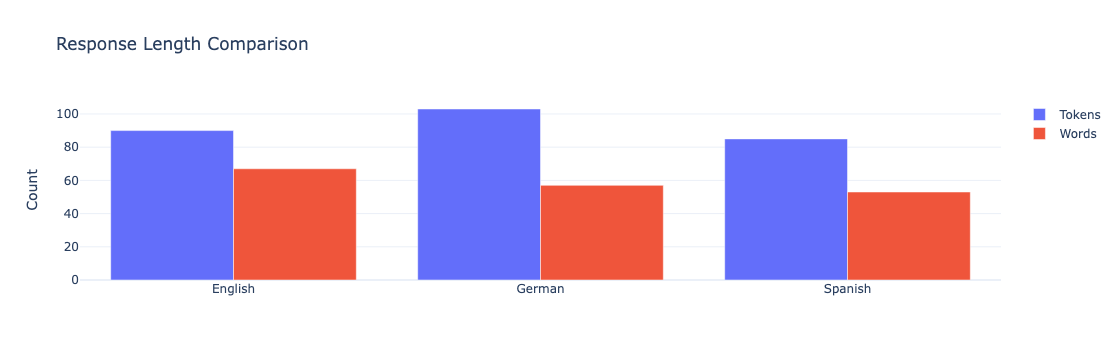

In [84]:
import plotly.graph_objects as go

# Prepare data
languages = ['English', 'German', 'Spanish']
responses = [en_response, de_response, es_response]

token_counts = [r.tokens_output if r else 0 for r in responses]
word_counts = [
    quantitative.calculate_all_quantitative_metrics(r.content, r.tokens_output, lang)['length_metrics']['word_count']
    if r else 0
    for r, lang in zip(responses, ['en', 'de', 'es'])
]

# Create bar chart
fig = go.Figure(data=[
    go.Bar(name='Tokens', x=languages, y=token_counts),
    go.Bar(name='Words', x=languages, y=word_counts)
])

fig.update_layout(
    title='Response Length Comparison',
    barmode='group',
    yaxis_title='Count',
    template='plotly_white'
)

fig.show()

## 🎯 Part 7: Key Takeaways

### What We've Demonstrated:

1. **Cultural Adaptation ≠ Translation**
   - German: Direct, structured, task-focused
   - Spanish: Relational, warm, context-rich

2. **Linguistic Theory in Practice**
   - Hall's high/low-context framework
   - Brown & Levinson's politeness theory
   - T-V distinction (formal pronouns)

3. **Measurable Quality Metrics**
   - Lexical diversity
   - Token efficiency
   - Cultural appropriateness

4. **Zero-Cost Local Inference**
   - Gemma 2 9B provides excellent multilingual quality
   - No API costs during development
   - Real-time adaptation testing

### Applications:

- 🌍 International business communication
- 🤖 Culturally-aware chatbots
- 📧 Automated email generation
- 🎓 Language learning tools
- 🔬 Cross-cultural NLP research
